In [1]:
from tensorflow import keras
from data_load import load_netcdf
from models import data_prep, compile_and_fit
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Reshape

In [2]:
df = load_netcdf('C:/Studia/maciej-romanski/data/gaj_olawski')

c:\Studia\maciej-romanski\data_load.py:88: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(netCDF2df(path+'/'+filename),ignore_index=True)


In [3]:
df

,t2m,d2m,msl,tp,ssrd,Date Time,windspeed_10,windspeed_100
0,275.332254,274.286849,101918.532777,1.398094e-06,0.0,2014-01-01 00:00:00,2.752297,6.002099
1,275.114286,274.076596,101898.790426,2.019469e-06,0.0,2014-01-01 01:00:00,2.651433,5.802979
2,274.602475,273.536258,101880.919674,3.650579e-06,0.0,2014-01-01 02:00:00,2.673724,5.867424
3,274.942533,273.854905,101837.691774,7.068143e-06,0.0,2014-01-01 03:00:00,2.851064,5.996153
4,275.290868,274.053719,101794.644996,1.141777e-05,0.0,2014-01-01 04:00:00,3.129658,6.222691
...,...,...,...,...,...,...,...,...
70123,284.349792,281.137893,101546.254844,5.248368e-06,0.0,2021-12-31 19:00:00,4.863692,9.516209
70124,284.497001,281.261584,101575.888525,-8.673617e-19,0.0,2021-12-31 20:00:00,5.021026,9.703558
70125,284.358537,281.442320,101573.573393,2.385622e-06,0.0,2021-12-31 21:00:00,5.312536,10.136289
70126,284.420482,281.305074,101574.499446,1.700153e-04,0.0,2021-12-31 22:00:00,6.211414,11.058230


In [4]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=6, y_featurename='windspeed_10')

In [7]:
model = Sequential([
            Dense(units=24, activation='relu', input_shape=(24, X_train.shape[2])),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(1),
            Reshape([1,24]),
            Dense(1),
            Reshape([1])
        ])

compile_and_fit(model, X_train, y_train)

Epoch 1/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0115
Epoch 2/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0071
Epoch 3/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0062
Epoch 4/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0060
Epoch 5/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0059
Epoch 6/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0058
Epoch 7/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0058
Epoch 8/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0057
Epoch 9/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0057
Epoch 10/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0057
Epoch 11/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0057
Epoch 12/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0056
E

In [15]:
predictions = model.predict(X_test)
# predictions = scaler_y.inverse_transform(predictions)

273/273 [==============================] - 0s 1ms/step


273/273 [==============================] - 0s 1ms/step


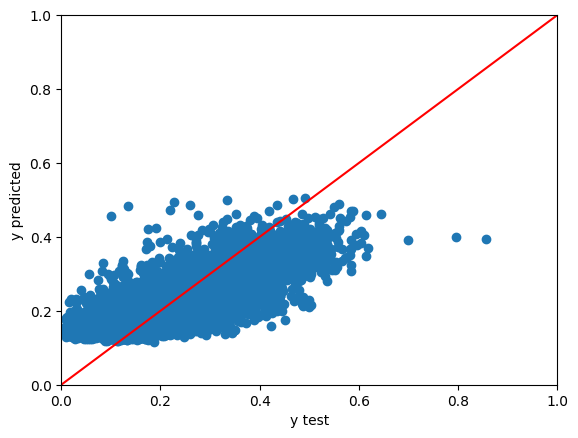

In [8]:
predictions = model.predict(X_test)
plt.scatter(x=y_test[:,0], y=predictions[:,0])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.plot([0,1],[0,1], 'r')

Epoch 1/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0138
Epoch 2/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0038
Epoch 3/20
1917/1917 [==============================] - 4s 2ms/step - loss: 0.0031
Epoch 4/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0028
Epoch 5/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0026
Epoch 6/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0025
Epoch 7/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0024
Epoch 8/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0023
Epoch 9/20
1917/1917 [==============================] - 4s 2ms/step - loss: 0.0023
Epoch 10/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0022
Epoch 11/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0022
Epoch 12/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0022
E

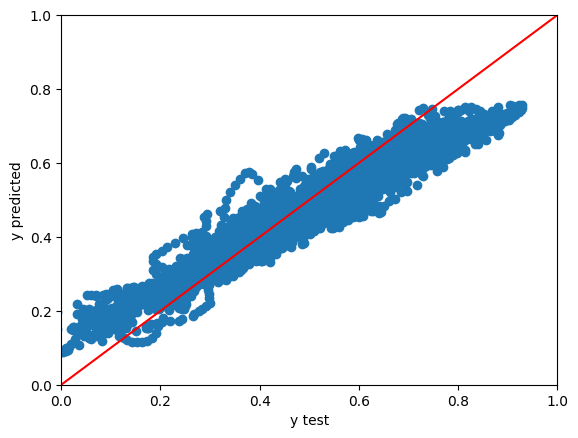

In [9]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=6, y_featurename='t2m')
model = Sequential([
            Dense(units=24, activation='relu', input_shape=(24, X_train.shape[2])),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(1),
            Reshape([1,24]),
            Dense(1),
            Reshape([1])
        ])
compile_and_fit(model, X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(x=y_test[:,0], y=predictions[:,0])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.plot([0,1],[0,1], 'r')

Epoch 1/20
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0098
Epoch 2/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0033
Epoch 3/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0022
Epoch 4/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0016
Epoch 5/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0014
Epoch 6/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0013
Epoch 7/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 8/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 9/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 10/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 11/20
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0011
Epoch 12/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0011
E

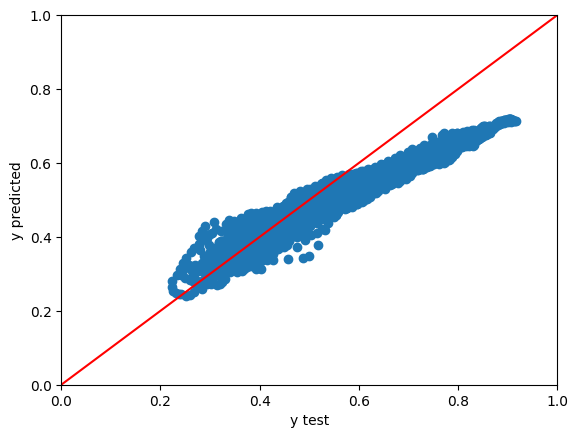

In [12]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=6, y_featurename='msl')
model = Sequential([
            Dense(units=24, activation='relu', input_shape=(24, X_train.shape[2])),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(1),
            Reshape([1,24]),
            Dense(1),
            Reshape([1])
        ])
compile_and_fit(model, X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(x=y_test[:,0], y=predictions[:,0])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.plot([0,1],[0,1], 'r')

Epoch 1/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0130
Epoch 2/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0083
Epoch 3/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0078
Epoch 4/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0076
Epoch 5/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0076
Epoch 6/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0074
Epoch 7/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0074
Epoch 8/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0073
Epoch 9/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0073
Epoch 10/20
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0072
Epoch 11/20
1917/1917 [==============================] - 5s 2ms/step - loss: 0.0073
Epoch 12/20
273/273 [==============================] - 0s 1ms/step


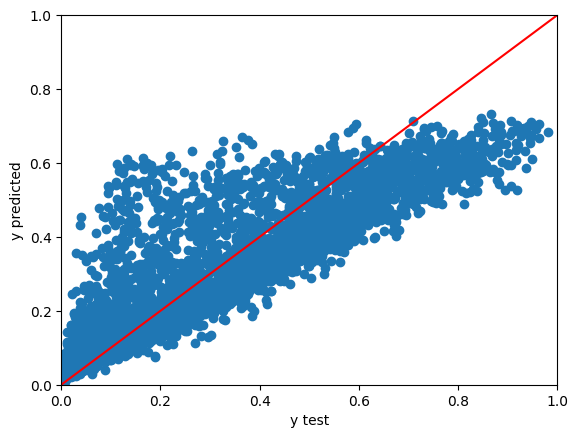

In [13]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=6, y_featurename='ssrd')
model = Sequential([
            Dense(units=24, activation='relu', input_shape=(24, X_train.shape[2])),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(1),
            Reshape([1,24]),
            Dense(1),
            Reshape([1])
        ])
compile_and_fit(model, X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(x=y_test[:,0], y=predictions[:,0])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.plot([0,1],[0,1], 'r')

Epoch 1/20
1917/1917 [==============================] - 9s 4ms/step - loss: 0.0082
Epoch 2/20
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0025
Epoch 3/20
1917/1917 [==============================] - 11s 6ms/step - loss: 0.0019
Epoch 4/20
1917/1917 [==============================] - 7s 3ms/step - loss: 0.0016
Epoch 5/20
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0015
Epoch 6/20
1917/1917 [==============================] - 7s 4ms/step - loss: 0.0015
Epoch 7/20
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0015
Epoch 8/20
1917/1917 [==============================] - 8s 4ms/step - loss: 0.0014
Epoch 9/20
1917/1917 [==============================] - 12s 6ms/step - loss: 0.0014
Epoch 10/20
1917/1917 [==============================] - 11s 6ms/step - loss: 0.0014
Epoch 11/20
1917/1917 [==============================] - 7s 4ms/step - loss: 0.0014
Epoch 12/20
1917/1917 [==============================] - 11s 6ms/step - loss: 0.00

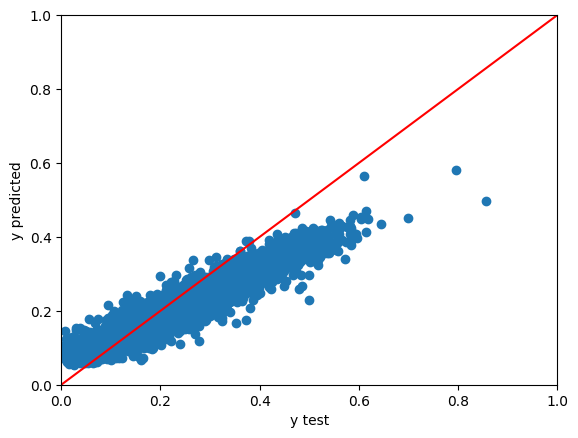

In [5]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=1, y_featurename='windspeed_10')
model = Sequential([
            Dense(units=24, activation='relu', input_shape=(24, X_train.shape[2])),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(1),
            Reshape([1,24]),
            Dense(1),
            Reshape([1])
        ])
compile_and_fit(model, X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(x=y_test[:,0], y=predictions[:,0])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.plot([0,1],[0,1], 'r')

Epoch 1/20
1917/1917 [==============================] - 10s 5ms/step - loss: 0.0090
Epoch 2/20
1917/1917 [==============================] - 7s 4ms/step - loss: 0.0021
Epoch 3/20
1917/1917 [==============================] - 7s 4ms/step - loss: 0.0015
Epoch 4/20
1917/1917 [==============================] - 7s 4ms/step - loss: 0.0012
Epoch 5/20
1917/1917 [==============================] - 7s 4ms/step - loss: 0.0010
Epoch 6/20
1917/1917 [==============================] - 7s 4ms/step - loss: 9.1859e-04
Epoch 7/20
1917/1917 [==============================] - 8s 4ms/step - loss: 8.4930e-04
Epoch 8/20
1917/1917 [==============================] - 11s 6ms/step - loss: 8.0229e-04
Epoch 9/20
1917/1917 [==============================] - 10s 5ms/step - loss: 7.6176e-04
Epoch 10/20
1917/1917 [==============================] - 9s 5ms/step - loss: 7.3116e-04
Epoch 11/20
1917/1917 [==============================] - 10s 5ms/step - loss: 7.2287e-04
Epoch 12/20
1917/1917 [==============================] - 

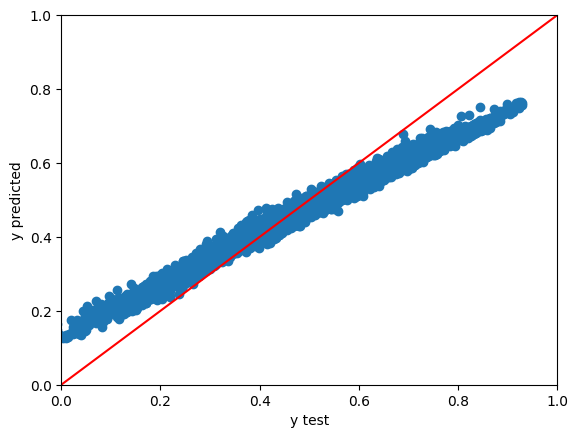

In [6]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=1, y_featurename='t2m')
model = Sequential([
            Dense(units=24, activation='relu', input_shape=(24, X_train.shape[2])),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(1),
            Reshape([1,24]),
            Dense(1),
            Reshape([1])
        ])
compile_and_fit(model, X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(x=y_test[:,0], y=predictions[:,0])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.plot([0,1],[0,1], 'r')

Epoch 1/20
1917/1917 [==============================] - 46s 23ms/step - loss: 0.0027
Epoch 2/20
1917/1917 [==============================] - 44s 23ms/step - loss: 7.7631e-04
Epoch 3/20
1917/1917 [==============================] - 22s 11ms/step - loss: 5.2315e-04
Epoch 4/20
1917/1917 [==============================] - 21s 11ms/step - loss: 4.0166e-04
Epoch 5/20
1917/1917 [==============================] - 21s 11ms/step - loss: 3.2684e-04
Epoch 6/20
1917/1917 [==============================] - 22s 11ms/step - loss: 2.7748e-04
Epoch 7/20
1917/1917 [==============================] - 22s 11ms/step - loss: 2.4509e-04
Epoch 8/20
1917/1917 [==============================] - 22s 12ms/step - loss: 2.2355e-04
Epoch 9/20
1917/1917 [==============================] - 22s 12ms/step - loss: 2.1023e-04
Epoch 10/20
1917/1917 [==============================] - 23s 12ms/step - loss: 2.0292e-04
Epoch 11/20
1917/1917 [==============================] - 25s 13ms/step - loss: 1.9354e-04
Epoch 12/20
1917/1917 [

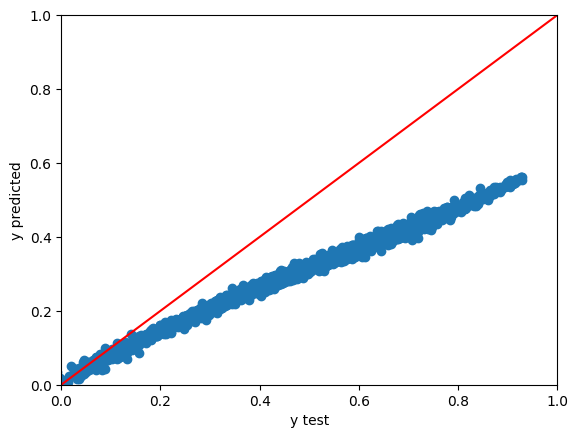

In [7]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=1, y_featurename='t2m')

model = Sequential([
            LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dropout(0.5),
            Dense(units=100, activation='relu'),
            Dense(1),
        ])
compile_and_fit(model, X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(x=y_test[:,0], y=predictions[:,0])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.plot([0,1],[0,1], 'r')

Epoch 1/20
1917/1917 [==============================] - 25s 12ms/step - loss: 0.0039
Epoch 2/20
1917/1917 [==============================] - 23s 12ms/step - loss: 0.0021
Epoch 3/20
1917/1917 [==============================] - 23s 12ms/step - loss: 0.0018
Epoch 4/20
1917/1917 [==============================] - 22s 12ms/step - loss: 0.0017
Epoch 5/20
1917/1917 [==============================] - 22s 12ms/step - loss: 0.0015
Epoch 6/20
1917/1917 [==============================] - 22s 12ms/step - loss: 0.0015
Epoch 7/20
1917/1917 [==============================] - 22s 12ms/step - loss: 0.0014
Epoch 8/20
1917/1917 [==============================] - 22s 12ms/step - loss: 0.0013
Epoch 9/20
1917/1917 [==============================] - 22s 12ms/step - loss: 0.0013
Epoch 10/20
1917/1917 [==============================] - 23s 12ms/step - loss: 0.0012
Epoch 11/20
1917/1917 [==============================] - 23s 12ms/step - loss: 0.0012
Epoch 12/20
1917/1917 [==============================] - 22s 12

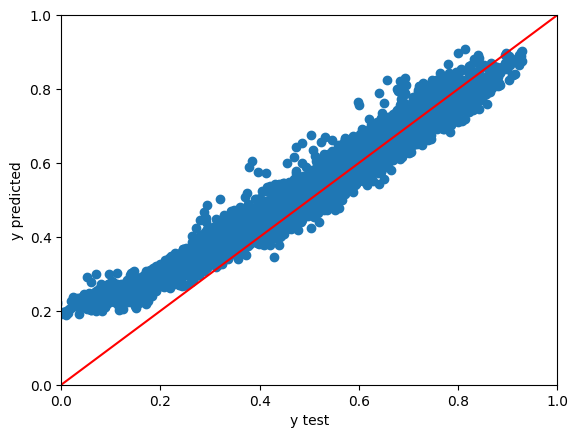

In [8]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=6, y_featurename='t2m')

model = Sequential([
            LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dropout(0.5),
            Dense(units=100, activation='relu'),
            Dense(1),
        ])
compile_and_fit(model, X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(x=y_test[:,0], y=predictions[:,0])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.plot([0,1],[0,1], 'r')

Epoch 1/20
1917/1917 [==============================] - 24s 12ms/step - loss: 0.0025
Epoch 2/20
1917/1917 [==============================] - 22s 12ms/step - loss: 0.0012
Epoch 3/20
1917/1917 [==============================] - 22s 12ms/step - loss: 0.0011
Epoch 4/20
1917/1917 [==============================] - 22s 12ms/step - loss: 0.0010
Epoch 5/20
1917/1917 [==============================] - 22s 12ms/step - loss: 9.8831e-04
Epoch 6/20
1917/1917 [==============================] - 22s 12ms/step - loss: 9.6490e-04
Epoch 7/20
1917/1917 [==============================] - 22s 12ms/step - loss: 9.4111e-04
Epoch 8/20
1917/1917 [==============================] - 22s 12ms/step - loss: 9.3593e-04
Epoch 9/20
1917/1917 [==============================] - 22s 12ms/step - loss: 9.1962e-04
Epoch 10/20
1917/1917 [==============================] - 22s 12ms/step - loss: 9.0745e-04
Epoch 11/20
1917/1917 [==============================] - 22s 12ms/step - loss: 9.0821e-04
Epoch 12/20
1917/1917 [============

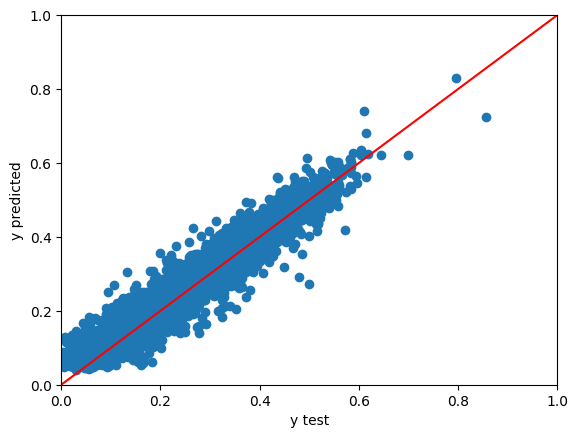

In [9]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=1, y_featurename='windspeed_10')

model = Sequential([
            LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dropout(0.5),
            Dense(units=100, activation='relu'),
            Dense(1),
        ])
compile_and_fit(model, X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(x=y_test[:,0], y=predictions[:,0])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.plot([0,1],[0,1], 'r')

Epoch 1/20
1917/1917 [==============================] - 25s 13ms/step - loss: 0.0070
Epoch 2/20
1917/1917 [==============================] - 24s 13ms/step - loss: 0.0056
Epoch 3/20
1917/1917 [==============================] - 24s 13ms/step - loss: 0.0054
Epoch 4/20
1917/1917 [==============================] - 24s 12ms/step - loss: 0.0052
Epoch 5/20
1917/1917 [==============================] - 24s 12ms/step - loss: 0.0051
Epoch 6/20
1917/1917 [==============================] - 24s 12ms/step - loss: 0.0051
Epoch 7/20
1917/1917 [==============================] - 24s 12ms/step - loss: 0.0050
Epoch 8/20
1917/1917 [==============================] - 24s 13ms/step - loss: 0.0050
Epoch 9/20
1917/1917 [==============================] - 24s 13ms/step - loss: 0.0049
Epoch 10/20
1917/1917 [==============================] - 24s 13ms/step - loss: 0.0049
Epoch 11/20
1917/1917 [==============================] - 25s 13ms/step - loss: 0.0049
Epoch 12/20
1917/1917 [==============================] - 24s 13

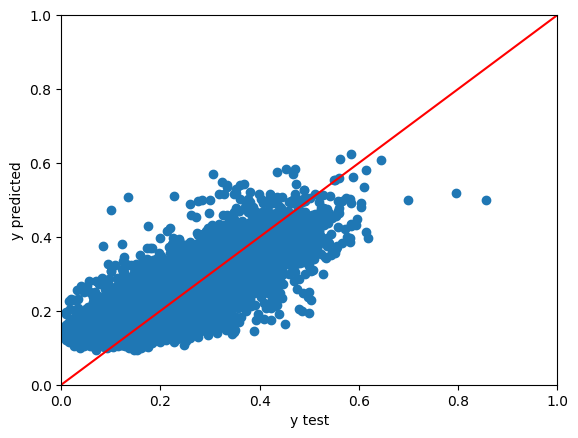

In [10]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=6, y_featurename='windspeed_10')

model = Sequential([
            LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dropout(0.5),
            Dense(units=100, activation='relu'),
            Dense(1),
        ])
compile_and_fit(model, X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(x=y_test[:,0], y=predictions[:,0])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.plot([0,1],[0,1], 'r')

In [30]:
def compile_and_fit_val(model, X_train, y_train, X_test, y_test, epochs):
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=2,
                                                   mode='min')

    model.compile(loss='mean_squared_error', optimizer='adam')

    # history = model.fit(X_train, y_train, epochs=20, batch_size=32, callbacks=[early_stopping], validation_data=(X_test,y_test), verbose=1)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test,y_test), verbose=1)
    return history

Epoch 1/50
1917/1917 [==============================] - 25s 12ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 2/50
1917/1917 [==============================] - 23s 12ms/step - loss: 0.0012 - val_loss: 9.5130e-04
Epoch 3/50
1917/1917 [==============================] - 23s 12ms/step - loss: 0.0011 - val_loss: 8.9169e-04
Epoch 4/50
1917/1917 [==============================] - 23s 12ms/step - loss: 0.0010 - val_loss: 8.7745e-04
Epoch 5/50
1917/1917 [==============================] - 23s 12ms/step - loss: 9.8985e-04 - val_loss: 8.6135e-04
Epoch 6/50
1917/1917 [==============================] - 23s 12ms/step - loss: 9.5785e-04 - val_loss: 8.9510e-04
Epoch 7/50
1917/1917 [==============================] - 23s 12ms/step - loss: 9.3394e-04 - val_loss: 0.0010
Epoch 8/50
1917/1917 [==============================] - 23s 12ms/step - loss: 9.2097e-04 - val_loss: 9.2320e-04
Epoch 9/50
1917/1917 [==============================] - 23s 12ms/step - loss: 9.0977e-04 - val_loss: 9.7994e-04
Epoch 10/50
1917

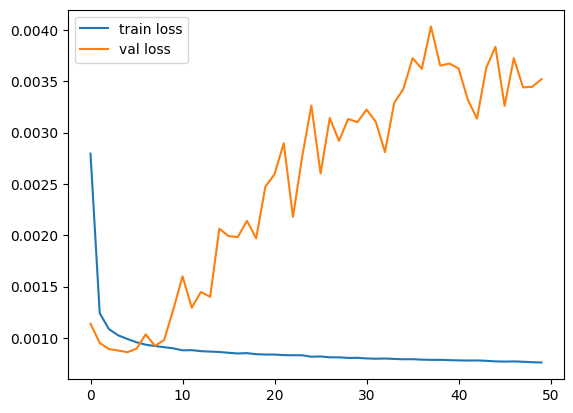

In [26]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=1, y_featurename='windspeed_10')

model = Sequential([
            LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dropout(0.5),
            Dense(units=100, activation='relu'),
            Dense(1),
        ])
history = compile_and_fit_val(model, X_train, y_train, X_test, y_test)

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

Epoch 1/50
1917/1917 [==============================] - 27s 13ms/step - loss: 0.0067 - val_loss: 0.0048
Epoch 2/50
1917/1917 [==============================] - 25s 13ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 3/50
1917/1917 [==============================] - 25s 13ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 4/50
1917/1917 [==============================] - 25s 13ms/step - loss: 0.0052 - val_loss: 0.0045
Epoch 5/50
1917/1917 [==============================] - 25s 13ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 6/50
1917/1917 [==============================] - 25s 13ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 7/50
1917/1917 [==============================] - 25s 13ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 8/50
1917/1917 [==============================] - 25s 13ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 9/50
1917/1917 [==============================] - 25s 13ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 10/50
1917/1917 [==============================] - 25s 13m

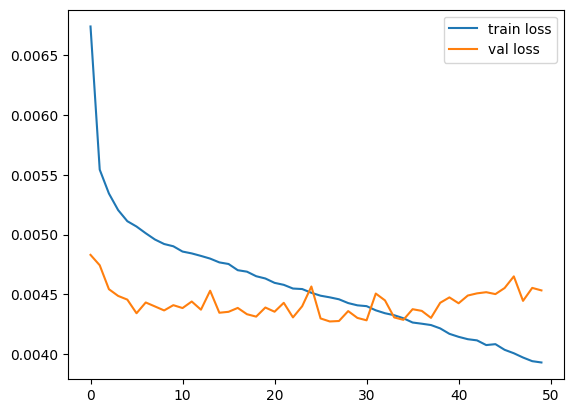

In [27]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=6, y_featurename='windspeed_10')

model = Sequential([
            LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])),
            Dropout(0.5),
            Dense(units=100, activation='relu'),
            Dense(1),
        ])
history = compile_and_fit_val(model, X_train, y_train, X_test, y_test)

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

Epoch 1/50
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0102 - val_loss: 0.0049
Epoch 2/50
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 3/50
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 4/50
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 5/50
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 6/50
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 7/50
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 8/50
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 9/50
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 10/50
1917/1917 [==============================] - 5s 3ms/step - loss: 0.001

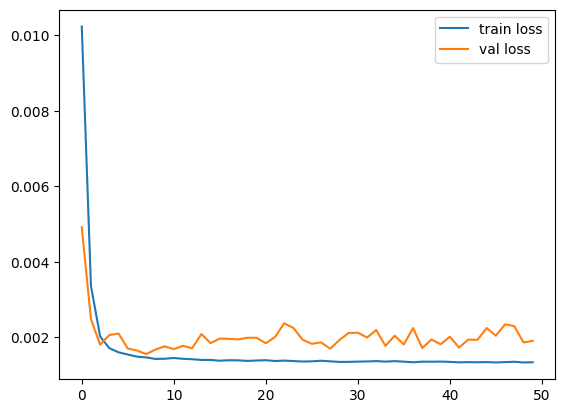

In [28]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=1, y_featurename='windspeed_10')

model = Sequential([
            Dense(units=24, activation='relu', input_shape=(24, X_train.shape[2])),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(1),
            Reshape([1,24]),
            Dense(1),
            Reshape([1])
        ])
history = compile_and_fit_val(model, X_train, y_train, X_test, y_test)

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

Epoch 1/200
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0032
Epoch 2/200
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 3/200
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 4/200
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 5/200
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 6/200
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 7/200
1917/1917 [==============================] - 5s 3ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 8/200
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 9/200
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 10/200
1917/1917 [==============================] - 6s 3ms/step - l

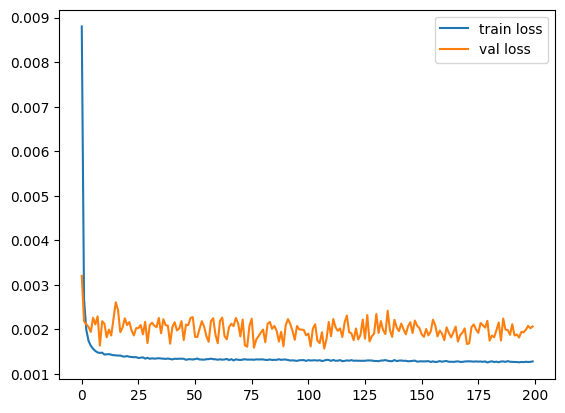

In [31]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=1, y_featurename='windspeed_10')

model = Sequential([
            Dense(units=24, activation='relu', input_shape=(24, X_train.shape[2])),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(1),
            Reshape([1,24]),
            Dense(1),
            Reshape([1])
        ])
history = compile_and_fit_val(model, X_train, y_train, X_test, y_test, epochs=200)

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

Epoch 1/50
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0098 - val_loss: 0.0062
Epoch 2/50
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 3/50
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0062 - val_loss: 0.0056
Epoch 4/50
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 5/50
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 6/50
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 7/50
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 8/50
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 9/50
1917/1917 [==============================] - 6s 3ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 10/50
1917/1917 [==============================] - 6s 3ms/step - loss: 0.005

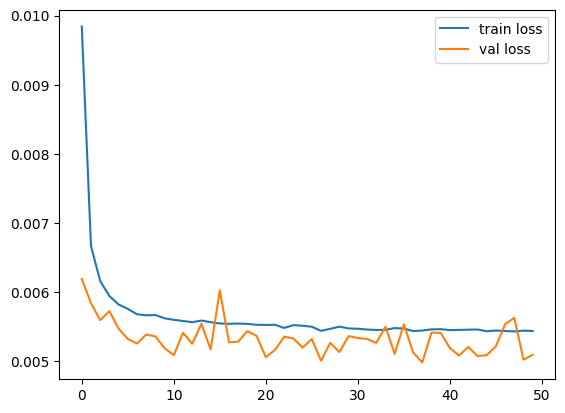

In [32]:
X_train, y_train, X_test, y_test, scaler_y = data_prep(df, trainFrom=2014, trainTo=2020, testFrom=2021, testTo=2021, lookback=24, toFuture=6, y_featurename='windspeed_10')

model = Sequential([
            Dense(units=24, activation='relu', input_shape=(24, X_train.shape[2])),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(units=24, activation='relu'),
            Dropout(0.2),
            Dense(1),
            Reshape([1,24]),
            Dense(1),
            Reshape([1])
        ])
history = compile_and_fit_val(model, X_train, y_train, X_test, y_test, epochs=50)

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()